In [1]:
# import packages
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
folder = r'data/'
files = glob.glob(folder + '*-fordgobike-tripdata.csv')

dfs = (pd.read_csv(file) for file in files)
df = pd.concat(dfs, ignore_index=True)

In [3]:
df_weather = pd.read_csv('data/weather 2008.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,72393,2018-04-30 22:49:32.6180,2018-05-01 18:56:06.3010,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3940,Customer,NaN,NaN,No
1,81034,2018-04-30 17:46:04.9970,2018-05-01 16:16:39.2470,122.0,19th St at Mission St,37.760299,-122.418892,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,3374,Customer,NaN,NaN,No
2,86142,2018-04-30 16:07:13.9190,2018-05-01 16:02:56.7170,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3191,Subscriber,1974.0,Male,Yes
3,68839,2018-04-30 17:11:57.4640,2018-05-01 12:19:16.7870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,115.0,Jackson Playground,37.765026,-122.398773,2970,Customer,1974.0,Female,No
4,59091,2018-04-30 18:45:21.5560,2018-05-01 11:10:13.5410,196.0,Grand Ave at Perkins St,37.808894,-122.256460,233.0,12th St at 4th Ave,37.795812,-122.255555,522,Customer,1965.0,Male,No


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [7]:
df.shape

(1863721, 16)

In [8]:
df_weather.describe()

,AWND,CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN,WDF2,WDF5,WDMV,WSF2,WSF5
count,60.000000,233.000000,328.000000,314.000000,253.000000,307.000000,314.000000,328.000000,60.000000,58.000000,0.0,60.000000,58.000000
mean,7.796667,232.137339,40.560976,83.079618,1385.968379,57.642671,67.594904,48.060976,244.166667,222.758621,NaN,31.045000,47.051724
std,2.329397,319.621554,7.479796,14.021322,1262.825262,8.086920,10.228484,6.855392,78.509239,97.365167,NaN,9.266148,21.003277
min,4.300000,0.000000,20.000000,56.000000,4.000000,38.600000,42.600000,30.500000,10.000000,10.000000,NaN,21.000000,26.000000
25%,6.225000,0.000000,35.000000,71.000000,179.000000,51.350000,59.825000,42.750000,197.500000,170.000000,NaN,24.800000,33.500000
50%,7.500000,70.000000,41.000000,84.000000,1080.000000,57.100000,66.550000,48.550000,270.000000,265.000000,NaN,29.100000,41.000000
75%,8.975000,374.000000,47.000000,96.000000,2476.000000,64.200000,75.075000,53.325000,290.000000,290.000000,NaN,34.900000,54.000000
max,13.600000,1195.000000,55.000000,108.000000,4805.000000,74.400000,90.700000,67.600000,360.000000,360.000000,NaN,74.000000,159.000000


In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 16 columns):
STATION    421 non-null object
NAME       421 non-null object
DATE       421 non-null object
AWND       60 non-null float64
CDSD       233 non-null float64
EMNT       328 non-null float64
EMXT       314 non-null float64
HDSD       253 non-null float64
TAVG       307 non-null float64
TMAX       314 non-null float64
TMIN       328 non-null float64
WDF2       60 non-null float64
WDF5       58 non-null float64
WDMV       0 non-null float64
WSF2       60 non-null float64
WSF5       58 non-null float64
dtypes: float64(13), object(3)
memory usage: 52.7+ KB


In [10]:
df_weather.shape

(421, 16)

## strucutre issues

here I decided to split start_time column into many column to make it easer for the exploration analysis 

In [11]:
df.start_time = pd.to_datetime(df.start_time)
df['start_month']= df.start_time.dt.month
df['start_day']= df.start_time.dt.day
df['start_day_name']= df.start_time.dt.day_name()
df['start_hour']= df.start_time.dt.hour

for weather dataset it has many station the station name I am interested in called 'SAN FRANCISCO DOWNTOWN, CA US'
so I will keep only this station in the dataset

In [12]:
df_weather = df_weather[df_weather.NAME == 'SAN FRANCISCO DOWNTOWN, CA US']

also the DATE column in df_weather has the year and month along-side. I will put the month in seperate column named 'MONTH'

In [13]:
_ , df_weather['MONTH'] = df_weather['DATE'].str.split('-').str

## month distribution

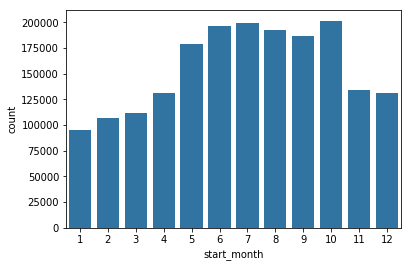

In [14]:
base_color = sns.color_palette()[0]
sns.countplot('start_month',data=df, color=base_color)

## weather Temp each month

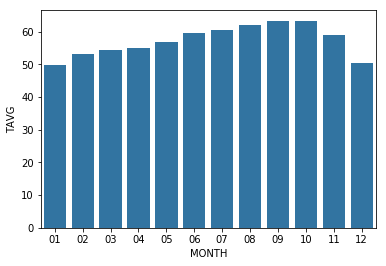

In [15]:
sns.barplot('MONTH', 'TAVG', data=df_weather, color=base_color);

## day distribution

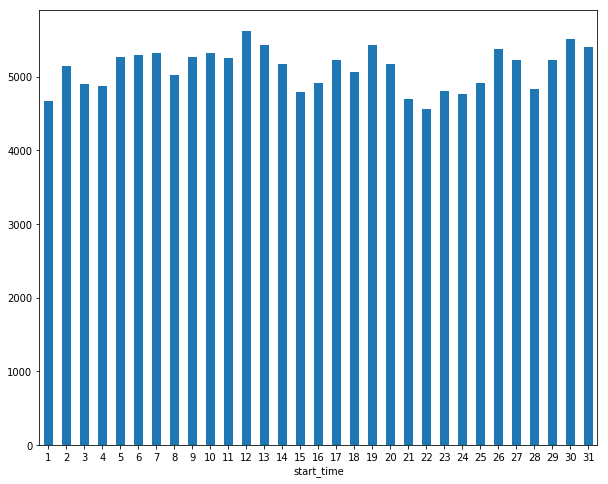

In [16]:
index = pd.DatetimeIndex(df.start_time)
df1 = df.reindex(index=index)
plt.figure(figsize=(10,8))
df1 = df1.resample('D').size()
df1.groupby(df1.index.day).mean().plot('bar', color=base_color)
plt.xticks(rotation=0);

## hour distribution

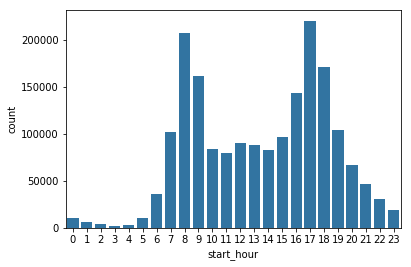

In [17]:
sns.countplot(df.start_hour, color=base_color);

## user type distribution

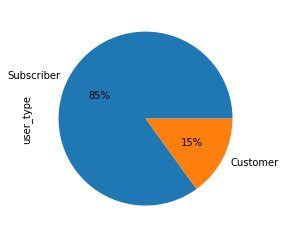

In [18]:
df.user_type.value_counts().plot('pie', autopct='%1.0f%%')

## gender distribution

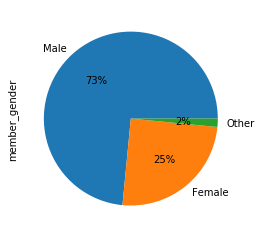

In [19]:
df.member_gender.value_counts().plot('pie', autopct='%1.0f%%')

## members birth distribution

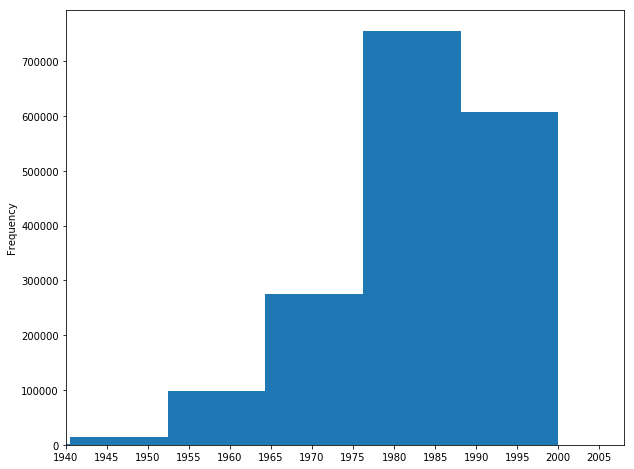

In [20]:
plt.figure(figsize=(10,8))
bins = np.arange(1940, 2008 + 5, 5)
df.member_birth_year.plot('hist', xticks=bins, xlim=(1940,2008))

## trip duration by gender

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

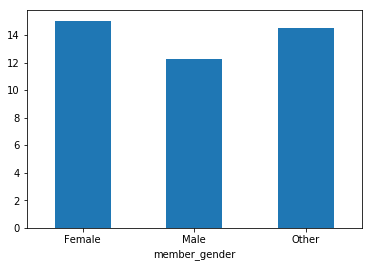

In [21]:
(df.groupby('member_gender').duration_sec.mean() / 60).plot('bar')
plt.xticks(rotation=0)

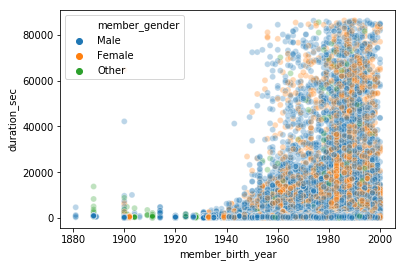

In [22]:
sns.scatterplot('member_birth_year', 'duration_sec', hue='member_gender', data=df,alpha= 0.3);


## most used bike

In [23]:
df.groupby('bike_id').duration_sec.sum().sort_values(ascending=False)[:10] //3600

bike_id
3961    330
3235    324
4452    294
1181    291
2970    288
2237    285
3570    283
3614    278
1298    273
2375    271
Name: duration_sec, dtype: int64

## bike usage distribution

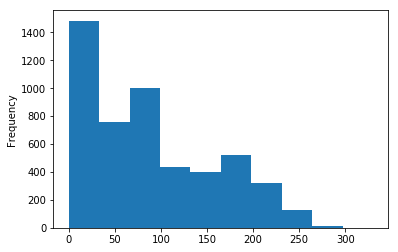

In [24]:
(df.groupby('bike_id').duration_sec.sum() //3600).plot('hist');